<a href="https://colab.research.google.com/github/captainakaps1/hello-web-app/blob/master/CatFamily_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
from fastai import  *
from fastai.vision import *

## Creating Folders

In [8]:
folder = 'cat'
file = 'cat.csv'

In [13]:
folder = 'lion'
file = 'lion.csv'

In [16]:
folder = 'tiger'
file = 'tiger.csv'

Path

In [17]:
#lets declare the path
path = Path('data/Cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

Download

In [11]:
classes = ['cat','lion','tiger']

In [18]:
download_images(path/file, dest, max_pics=200)

In [19]:
for i in classes:
  print(i)
  verify_images(path/i, delete=True, max_size=500)

cat


lion


tiger


Creating data bunch

In [20]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,train='',valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [21]:
data.classes

['cat', 'lion', 'tiger']

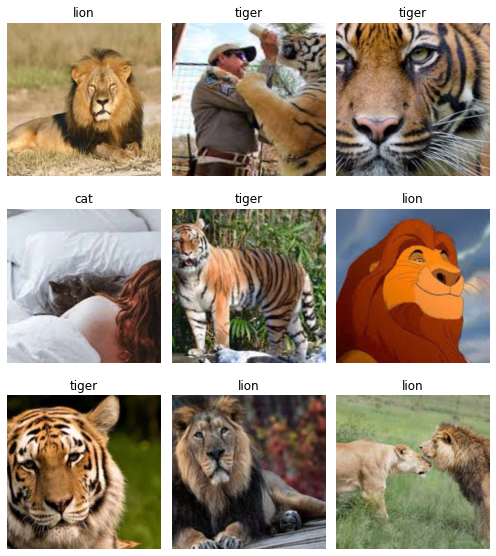

In [22]:
data.show_batch(rows=3, figsize=(7,8))

Train

In [23]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate,wd=1e-1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [24]:
learn.save('raw')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


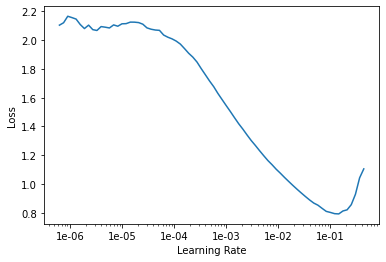

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(2e-3,2e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.140515,1.231065,0.083333,01:10
1,0.591648,1.028870,0.062500,01:10


In [27]:
learn.save('learn1')

In [28]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.070974,0.864613,0.062500,01:10
1,0.059869,0.800498,0.062500,01:10


In [29]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.077200,0.746883,0.083333,01:10
1,0.089081,0.747737,0.083333,01:12


interprating

In [30]:
learn.load('learn1')

Learner(data=ImageDataBunch;

Train: LabelList (192 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tiger,tiger,tiger,tiger,tiger
Path: data/Cats;

Valid: LabelList (48 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tiger,tiger,cat,cat,cat
Path: data/Cats;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

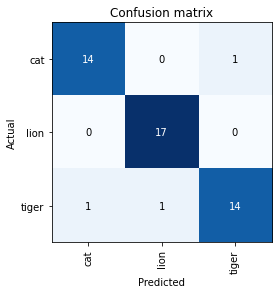

In [32]:
interp.plot_confusion_matrix()

In [33]:
learn.export()

In [34]:
defaults.device = torch.device('cpu')

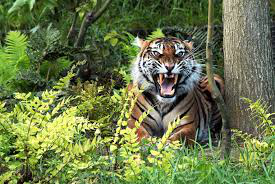

In [38]:
img = open_image(path/'tiger'/'00000021.jpg')
img

In [39]:
learn = load_learner(path)

In [40]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'tiger'

In [42]:
!pip list

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
asgiref                  3.2.10         
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.4.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.2.0          
beautifulsoup4           4.6.3          
bleach                   3.1.5          
blis                     0.4.1          
bokeh                    2.1.1          
boto                     2.49.0         
boto3                    1.14.24        
botocore                 1.17.24        
Bottleneck      